<a href="https://colab.research.google.com/github/VictorSairam/MNIST_Handwritted_Digit_Recognition/blob/main/Basic_MNIST_HandWritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [125]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [126]:
len(x_train)

60000

In [127]:
len(y_test)

10000

In [128]:
y_train.shape

(60000,)

In [129]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

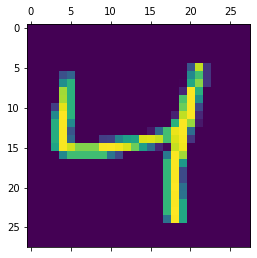

In [130]:
plt.matshow(x_train[2])

In [131]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [132]:
x_train = x_train/255
x_test = x_test/255

In [133]:
# Flatten the training dataset
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [134]:
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [123]:
# Create a simple neural network
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
              )
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1235 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9845


In [135]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9779


[0.07417064905166626, 0.9779000282287598]

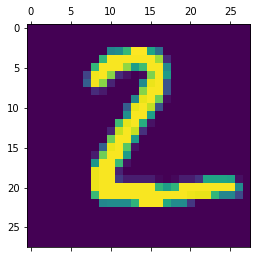

In [136]:
 plt.matshow(x_test[1])

In [137]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([7.04546422e-02, 9.93764102e-01, 9.99999166e-01, 8.81809890e-01,
       1.25040195e-11, 4.49295610e-01, 2.08874624e-02, 4.24673362e-06,
       4.94255900e-01, 1.47695300e-05], dtype=float32)

In [138]:
# To determine ma ximium score in the prediction
np.argmax(y_predicted[1])

2

In [139]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [140]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [141]:
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

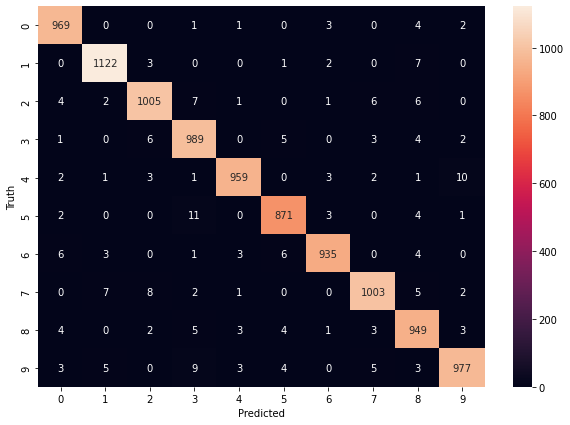

In [142]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [144]:
# Create a simple neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
              )
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2693 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1192 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0824 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9845
